<a href="https://colab.research.google.com/github/leaop/Graduation/blob/main/resumo_aula_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - importar as bibliotecas necessárias
Por padrão todas as bibliotecas necessárias ficam presentes no topo do código, na primeira célula

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go


# 2  - Realizar análise dos dados
Este passo serve para entender os dados e suas características, que nos permite saber quais os próximos passos.

Aqui que identificamos se existem valores núlos a serem tratados, valores textuais que devem ser convertidos em numéricos...

Se tiver uma classe alvo (o que queremos prever), já sabemos que iremos utilizar um algoritmo supervisionado. A depender do tipo de dados que queremos prever, iremos fazer uma classificação ou regressão.

In [ ]:
# Realiza a leitura da base de dados
df = pd.read_csv('carros_usados_data.csv')

In [ ]:
# Exibe o tipo de cados das colunas
df.dtypes

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include = 'O')

Saber quantos valores núlos existem pode ser interessante, mas não quer dizer muita coisa. O que faz muito mais sentido é verificar a porcentagem de valores núlos.

In [ ]:
# Exibe a quantidade de valores núlos por coluna
df.isna().sum()

In [ ]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

# 3 - Tratamento dos dados
Nesta etapa realizamos todas as operações necessárias para que os dados estejam em um formato adequado para treinar as redes neurais.

- 1 - Tratar valores núlos;
- 2 - Tratar valores textuais para numéricos;
- 3 - Normalizar os dados;
- 4 - Separar os dados em X e y;
- 5 - Separar os dados em X e y de treinamento e teste.

Colunas com valores núlos:
- Numéricas:
    - 'quilometragem';
    - 'potencia_motor';
    - 'num_portas';
    - 'num_assentos';
    - 'capacidade_tanque';
    - 'seguro';
    - 'despesas_manutencao'
- Textuais:
    - 'tipo_pneu';
    - 'opcionais'.

SOMENTE com`` menos de 1% de valores núlos``, podemos excluir as linhas com valores núlos;

Com mais de 50% de valores núlos podemos excluir a coluna com valores núlos

Colunas numéricas, podemos substituir os valores núlos pela média, mediana ou moda.

Colunas textuais podemos substituir pela moda.

In [ ]:
df['seguro'].mean()

50.05365104443255

In [ ]:
# Valores numéricos
df.loc[df['quilometragem'].isna(), 'quilometragem'] = df['quilometragem'].mean()
df.loc[df['potencia_motor'].isna(), 'potencia_motor'] = df['potencia_motor'].median()
df.loc[df['num_portas'].isna(), 'num_portas'] = df['num_portas'].median()
df.loc[df['num_assentos'].isna(), 'num_assentos'] = df['num_assentos'].median()
df.loc[df['capacidade_tanque'].isna(), 'capacidade_tanque'] = df['capacidade_tanque'].mode()[0]
df.loc[df['seguro'].isna(), 'seguro'] = df['seguro'].mean()
df.loc[df['despesas_manutencao'].isna(), 'despesas_manutencao'] = df['despesas_manutencao'].mean()

# Valores textuais
df.loc[df['tipo_pneu'].isna(), 'tipo_pneu'] = df['tipo_pneu'].mode()[0]
df.loc[df['opcionais'].isna(), 'opcionais'] = df['opcionais'].mode()[0]


In [ ]:
# Exibe a quantidade de valores núlos por coluna
df.isna().sum()

marca                  0
modelo                 0
cor                    0
combustivel            0
cambio                 0
ano_fabricacao         0
quilometragem          0
potencia_motor         0
num_portas             0
num_assentos           0
capacidade_tanque      0
seguro                 0
despesas_manutencao    0
tipo_pneu              0
opcionais              0
preco_venda            0
dtype: int64

In [ ]:
# Cria uma lista com todas as colunas do tipo object
colunas_object  = df.select_dtypes(include='object').columns.tolist()

# Exibe a lista com todas as colunas do tipo object
colunas_object

['marca', 'modelo', 'cor', 'combustivel', 'cambio', 'tipo_pneu', 'opcionais']

In [ ]:
for coluna in colunas_object:
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])

In [ ]:
# Exibe uma lista com todas as colunas do tipo object
df.select_dtypes(include='object').columns.tolist()

[]

Separar os dados em X e y antes de normalizar.

In [ ]:
X = df[df.columns[:-1]]
y = df[['preco_venda']]

Normalizar X e y

Em casos de classificação (onde queremos prever uma ou mais classes), não normalizamos os valores da classe alvo, normalizamos apenas os atributos. Já em regressões (que queremos prever um valor numérico contínuo), realizamos a normalização dos atributos e da classe alvo.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


scaler_features = MinMaxScaler()
scaler_features.fit(y)
y = scaler_features.transform(y)

Separar dados em X e y de treinamento e teste com 5% para testes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=19)

# 4 - Treinamento de uma rede neural
Para esta parte, precisamos definir o que queremos fazer.

Note que a camada de entrada da minha rede recebe o valor da quantidade de atributos (colunas de atributos);

Por padrão, as camadas ocultas (da segunda à penúltima camada), possuem a Função de ativação "relu";

A nossa última camada é a camada de saída e:
- Para regressões, possue apenas 1 neurônio e a função de ativaçõa é a "linear"
- Para classificações, possue 1 neurônio para cada classe e a função de ativação pode ser a soxtmax se quiser prever mais de uma classe, ou a sigmoide se desejar prever apenas uma classe.

OBS: Não existe ainda um método para definir a quantidade de camadas ocultas e quantos neurônios em cada uma. Quanto mais camadas e neurônios, mais processamento será necesário e não significa que os resultados serão melhores.


In [ ]:
X.shape[1]

15

In [ ]:
# Criamos uma instância do modelo de rede neural
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

# compila o modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# treina o modelo
model.fit(X_train, y_train, epochs=50, verbose = 1)

predict_rn = model.predict(X_test)

Epoch 1/50
5938/5938 [==============================] - 14s 2ms/step - loss: 0.0844 - mse: 0.0844
Epoch 2/50
5938/5938 [==============================] - 14s 2ms/step - loss: 0.0837 - mse: 0.0837
Epoch 3/50
5938/5938 [==============================] - 14s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 4/50
5938/5938 [==============================] - 17s 3ms/step - loss: 0.0836 - mse: 0.0836
Epoch 5/50
5938/5938 [==============================] - 14s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 6/50
5938/5938 [==============================] - 14s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 7/50
5938/5938 [==============================] - 13s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 8/50
5938/5938 [==============================] - 14s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 9/50
5938/5938 [==============================] - 16s 3ms/step - loss: 0.0836 - mse: 0.0836
Epoch 10/50
5938/5938 [==============================] - 16s 3ms/step - loss: 0.0836 - mse: 0.0836
Epoch 11/50
5938/59

# 5 - Avaliação dos resultados

Como estamos fazendo uma regressão, não temos como mediar a acurácia. Em regressão, uma das melhores métricas para avaliar os resultados é o erro médio quadrátio, abreviado carinhosamente de MSE.

Para classificações, é interessante analisar a acurácia e a matriz de confusão.

Outra avaliação muito interessante é a gráfica, para compararmos os valores reais com os previstos pela rede neural.

In [ ]:
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scaler_features.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_features.inverse_transform(predict_rn)

# Calcula o mse com a biblioteca do sklearn
mse = mean_squared_error(y_test_desnormalizado, predict_desnormalizado)
print("Mean squared error Regressão Linear: ", mse)

Mean squared error Regressão Linear:  3162001517.8190727


### ERRO MÉDIO QUADRÁTICO
Vamos imaginar que vocês estão tentando adivinhar o peso de uma melancia. Cada um de vocês faz um palpite, e depois comparamos esses palpites com o peso real da melancia. Para saber o quão bom ou ruim foram esses palpites, precisamos de uma medida que nos ajude a entender a diferença entre o palpite e o valor real.

É aí que entra o Erro Médio Quadrático. O EMQ é uma maneira de calcular o quão distante estão os nossos palpites em relação aos valores reais. Basicamente, é uma média das diferenças entre cada palpite e o valor real, mas com um pequeno truque. Em vez de simplesmente somar as diferenças, nós elevamos cada diferença ao quadrado antes de somá-las.

Mas por que elevar ao quadrado? Bem, isso tem algumas vantagens:

Sempre obtemos um valor positivo, já que o quadrado de um número negativo também é positivo. Isso é útil porque não queremos que os erros negativos e positivos se cancelem.
Dá mais peso aos erros maiores, fazendo com que as diferenças grandes sejam mais relevantes do que as pequenas.
Depois de elevar as diferenças ao quadrado e somá-las, calculamos a média desses valores, ou seja, dividimos a soma pelo número total de palpites. Por fim, para voltar à mesma escala dos nossos dados originais, tiramos a raiz quadrada dessa média.

Então, o Erro Médio Quadrático nos mostra o quanto, em média, os nossos palpites erraram em relação ao valor real. Quanto menor o EMQ, melhores foram nossos palpites!

In [ ]:
#  o peso real da melancia
peso_real = 7.31

# 10 palpites
palpites = [7, 5.32, 4.73, 8.5, 5.1, 7.10, 6.9, 5.9, 6.9, 8]


# Calculando o Erro Médio Quadrático
soma_dos_quadrados = 0
for palpite in palpites:
    diferenca = palpite - peso_real
    quadrado_da_diferenca = diferenca ** 2
    soma_dos_quadrados += quadrado_da_diferenca

erro_medio_quadratico = (soma_dos_quadrados / len(palpites)) ** 0.5

print(f"O Erro Médio Quadrático dos palpites é: {erro_medio_quadratico:.2f} kg")


O Erro Médio Quadrático dos palpites é: 1.41 kg


In [ ]:
# Repetindo o peso_real 10 vezes para criar uma lista com o mesmo tamanho que palpites
pesos_reais = [peso_real] * 10

# Calculando o Erro Médio Quadrático usando a função mean_squared_error do scikit-learn
mse = mean_squared_error(pesos_reais, palpites)

# Calculando a raiz quadrada do MSE para obter o RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(f"O Erro Médio Quadrático dos palpites é: {rmse:.2f} kg")


O Erro Médio Quadrático dos palpites é: 1.41 kg


In [ ]:
y_test_desnormalizado = scaler_features.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_features.inverse_transform(predict_rn)


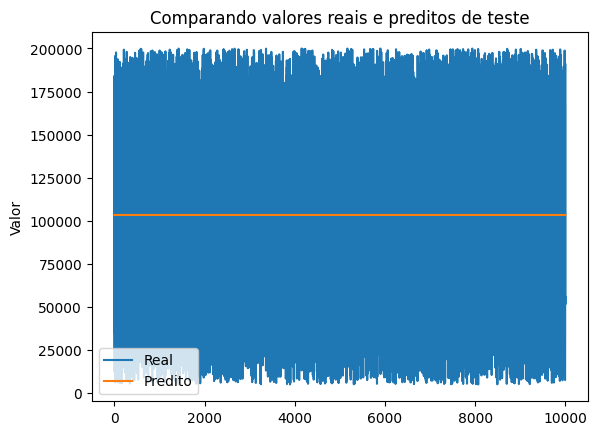

In [ ]:
grafico_x = [x for x in range(1,len(y_test_desnormalizado)+1)]

plt.plot(grafico_x, y_test_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()

Repare que são muitos dados de teste para o gráfico exibir, logo, podemos reduzir esta quantidade ou utilizar o outro método de gerar gráficos...

In [ ]:
# Define a função que plota o gráfico
def grafico(x_val, valy, namey, titulo, x_name, y_name, save):
    # Verifica se x_val é uma lista vazia
    if len(x_val) == 0:
        # Cria uma lista com o número de elementos na primeira lista de valy
        x_val = [x for x in range(1,len(valy[0])+1)]
    # Inicializa a lista de dados
    data = []
    # Define as cores para cada conjunto de dados
    cores = ['#DC143C','#FFB90F','#0000FF','#006400','#00FFFF','#8B008B']
    # Percorre cada conjunto de dados em valy
    for cont in range(0,len(valy)):
        # Adiciona um novo conjunto de dados na lista 'data'
        data.append(go.Scatter(x = x_val,
                    y = valy[cont],
                    mode = 'lines',
                    name = namey[cont],
                    marker = {'color': cores[cont]}))
    # Define as configurações do layout do gráfico
    layout = go.Layout(title = f'{titulo}', title_x=0.5,
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#000000'},
                   xaxis = {'title': x_name},
                   yaxis = {'title': y_name},
                   paper_bgcolor = 'rgb(188, 231, 245)',
                   plot_bgcolor = 'rgb(188, 231, 245)')
    # Cria um objeto 'Figure' do plotly com os dados e o layout
    fig = go.Figure(data=data, layout=layout)
    # Define as configurações para a legenda
    fig.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    entrywidth=200,
    y=1.15,
    xanchor="right",
    x=1,
    bgcolor = 'rgba(188, 231, 245,0.8)'
    ),
    font=dict(
            size=15,
            color="black"
        ))
    # Verifica se o parâmetro 'save' é True
    if save == True:
        # Salva o gráfico como uma imagem SVG e um arquivo HTML
        fig.write_image(f"grafico/{titulo}.svg", scale=1, width=1000, height=500)
        fig.write_html(f"grafico/{titulo}.html")
    # Verifica se o parâmetro 'save' é False
    if save == False:
        # Renderiza o gráfico na tela
        py.iplot(fig)


In [ ]:
grafico([], [y_test_desnormalizado.flatten(),predict_desnormalizado.flatten()], ['Real', 'Predito'], ' Valores reais Vs preditos de teste', '', 'Valor', False)

Porque este modelo ficou tão ruim, com o erro tão elevado?

Bem, esta é apenas uma base hipotética gerada de forma artificial para fins didáticos...

# Exercícios
Execute os passos de 1 a 5 para as duas bases de dados fictícias `ecommerce.csv` e `imoveis.csv`:

- 1 - importar as bibliotecas necessárias;

- 2  - Realizar análise dos dados;

- 3 - Tratamento dos dados;

- 4 - Treinamento de uma rede neural;

- 5 - Avaliação dos resultados.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
im = pd.read_csv('/content/imoveis.csv')
ec = pd.read_csv('/content/ecommerce.csv')

In [ ]:
im.dtypes


bairro              object
tipo                object
estilo              object
area_total         float64
area_construida    float64
quartos            float64
banheiros          float64
vagas_garagem      float64
idade_imovel       float64
condominio         float64
iptu               float64
mobilia             object
diferenciais        object
preco_venda          int64
dtype: object

In [ ]:
ec.dtypes

marca                  object
cor                    object
modelo                 object
preco                 float64
avaliacao             float64
quantidade_vendida    float64
peso                  float64
largura               float64
altura                float64
desconto              float64
comissao              float64
tamanho                object
material               object
categoria              object
dtype: object

In [ ]:
im.describe()

,area_total,area_construida,quartos,banheiros,vagas_garagem,idade_imovel,condominio,iptu,preco_venda
count,190000.000000,190000.000000,200000.000000,200000.000000,200000.000000,190000.000000,180000.000000,180000.000000,200000.000000
mean,49.989972,49.984286,49.957064,49.995873,50.107350,49.924262,50.122377,49.999391,550288.246715
std,28.782844,28.882228,28.883103,28.856121,28.833466,28.859808,28.834959,28.899215,260008.238728
min,0.000162,0.000028,0.000030,0.000060,0.001010,0.000405,0.000624,0.000255,100003.000000
25%,25.136509,24.900300,24.860227,24.964391,25.159931,24.961742,25.110600,25.004242,324635.500000
50%,50.040100,50.153795,50.025333,50.006142,50.267896,49.844018,50.256001,49.885798,551380.500000
75%,74.892262,74.926583,75.051046,75.071845,75.018785,74.900586,75.044160,75.064423,775213.000000
max,99.999489,99.999136,99.999947,99.999784,99.998857,99.999742,99.999537,99.999301,999991.000000


In [ ]:
im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bairro           200000 non-null  object 
 1   tipo             200000 non-null  object 
 2   estilo           200000 non-null  object 
 3   area_total       190000 non-null  float64
 4   area_construida  190000 non-null  float64
 5   quartos          200000 non-null  float64
 6   banheiros        200000 non-null  float64
 7   vagas_garagem    200000 non-null  float64
 8   idade_imovel     190000 non-null  float64
 9   condominio       180000 non-null  float64
 10  iptu             180000 non-null  float64
 11  mobilia          180000 non-null  object 
 12  diferenciais     180000 non-null  object 
 13  preco_venda      200000 non-null  int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 21.4+ MB


In [ ]:
im.describe(include = 'O')

,bairro,tipo,estilo,mobilia,diferenciais
count,200000,200000,200000,180000,180000
unique,182,182,182,182,182
top,accusantium,nobis,iste,eveniet,vero
freq,1188,1185,1186,1094,1083


In [ ]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   marca               200000 non-null  object 
 1   cor                 200000 non-null  object 
 2   modelo              200000 non-null  object 
 3   preco               190000 non-null  float64
 4   avaliacao           190000 non-null  float64
 5   quantidade_vendida  190000 non-null  float64
 6   peso                190000 non-null  float64
 7   largura             190000 non-null  float64
 8   altura              190000 non-null  float64
 9   desconto            180000 non-null  float64
 10  comissao            180000 non-null  float64
 11  tamanho             180000 non-null  object 
 12  material            180000 non-null  object 
 13  categoria           200000 non-null  object 
dtypes: float64(8), object(6)
memory usage: 21.4+ MB


In [ ]:
ec.describe()

,preco,avaliacao,quantidade_vendida,peso,largura,altura,desconto,comissao
count,190000.000000,190000.000000,190000.000000,190000.000000,190000.000000,190000.000000,180000.000000,180000.000000
mean,50.129041,50.048015,49.913130,49.946628,49.942379,50.078605,49.922372,49.911938
std,28.807193,28.930459,28.886700,28.829859,28.874149,28.872941,28.895326,28.922378
min,0.000270,0.000210,0.000468,0.001321,0.000105,0.000660,0.000109,0.000375
25%,25.219274,24.862820,24.861172,25.017071,24.913976,25.048275,24.803980,24.799983
50%,50.247111,50.028003,49.837759,49.908753,49.962590,50.157876,49.937842,49.932872
75%,74.954184,75.220203,74.941857,74.828141,74.991127,75.118590,74.932082,74.932320
max,99.999454,99.999875,99.999997,99.999701,99.999900,99.999428,99.999865,99.999963


In [ ]:
ec.describe(include = 'O')

,marca,cor,modelo,tamanho,material,categoria
count,200000,200000,200000,180000,180000,200000
unique,182,182,182,182,182,5
top,neque,quas,aliquid,tempore,assumenda,brinquedos
freq,1179,1207,1194,1088,1082,40069


In [ ]:
im.isna().sum()

bairro                 0
tipo                   0
estilo                 0
area_total         10000
area_construida    10000
quartos                0
banheiros              0
vagas_garagem          0
idade_imovel       10000
condominio         20000
iptu               20000
mobilia            20000
diferenciais       20000
preco_venda            0
dtype: int64

In [ ]:
ec.isna().sum()

marca                     0
cor                       0
modelo                    0
preco                 10000
avaliacao             10000
quantidade_vendida    10000
peso                  10000
largura               10000
altura                10000
desconto              20000
comissao              20000
tamanho               20000
material              20000
categoria                 0
dtype: int64

In [ ]:
# Valores numéricos
im.loc[im['area_total'].isna(), 'area_total'] = im['area_total'].mean()
im.loc[im['area_construida'].isna(), 'area_construida'] = im['area_construida'].median()
im.loc[im['idade_imovel'].isna(), 'idade_imovel'] = im['idade_imovel'].median()
im.loc[im['condominio'].isna(), 'condominio'] = im['condominio'].median()
im.loc[im['iptu'].isna(), 'iptu'] = im['iptu'].mode()[0]

# Valores textuais
im.loc[im['mobilia'].isna(), 'mobilia'] = im['mobilia'].mode()[0]
im.loc[im['diferenciais'].isna(), 'diferenciais'] = im['diferenciais'].mode()[0]


In [ ]:
im.isna().sum()

bairro             0
tipo               0
estilo             0
area_total         0
area_construida    0
quartos            0
banheiros          0
vagas_garagem      0
idade_imovel       0
condominio         0
iptu               0
mobilia            0
diferenciais       0
preco_venda        0
dtype: int64

In [ ]:
# Valores numéricos
ec.loc[ec['preco'].isna(), 'preco'] = ec['preco'].mean()
ec.loc[ec['avaliacao'].isna(), 'avaliacao'] = ec['avaliacao'].median()
ec.loc[ec['quantidade_vendida'].isna(), 'quantidade_vendida'] = ec['quantidade_vendida'].median()
ec.loc[ec['peso'].isna(), 'peso'] = ec['peso'].median()
ec.loc[ec['largura'].isna(), 'largura'] = ec['largura'].mode()[0]
ec.loc[ec['altura'].isna(), 'altura'] = ec['altura'].mean()
ec.loc[ec['desconto'].isna(), 'desconto'] = ec['desconto'].mean()
ec.loc[ec['comissao'].isna(), 'comissao'] = ec['comissao'].mean()

# Valores textuais
ec.loc[ec['tamanho'].isna(), 'tamanho'] = ec['tamanho'].mode()[0]
ec.loc[ec['material'].isna(), 'material'] = ec['material'].mode()[0]


In [ ]:
ec.isna().sum()

marca                 0
cor                   0
modelo                0
preco                 0
avaliacao             0
quantidade_vendida    0
peso                  0
largura               0
altura                0
desconto              0
comissao              0
tamanho               0
material              0
categoria             0
dtype: int64

In [ ]:
# Cria uma lista com todas as colunas do tipo object
colunas_object  = im.select_dtypes(include='object').columns.tolist()

# Exibe a lista com todas as colunas do tipo object
colunas_object

['bairro', 'tipo', 'estilo', 'mobilia', 'diferenciais']

In [ ]:
for coluna in colunas_object:
    le = LabelEncoder()
    im[coluna] = le.fit_transform(im[coluna])

In [ ]:
X = im[im.columns[:-1]]
y = im[['preco_venda']]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


scaler_features = MinMaxScaler()
scaler_features.fit(y)
y = scaler_features.transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=19)

In [ ]:
X.shape[1]

13

In [ ]:
# Criamos uma instância do modelo de rede neural
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

# compila o modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# treina o modelo
model.fit(X_train, y_train, epochs=5, verbose = 1)

predict_im = model.predict(X_test)

Epoch 1/5
5938/5938 [==============================] - 17s 3ms/step - loss: 0.0908 - mse: 0.0908
Epoch 2/5
5938/5938 [==============================] - 14s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 3/5
5938/5938 [==============================] - 15s 3ms/step - loss: 0.0836 - mse: 0.0836
Epoch 4/5
5938/5938 [==============================] - 14s 2ms/step - loss: 0.0836 - mse: 0.0836
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


In [ ]:
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scaler_features.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_features.inverse_transform(predict_im)

# Calcula o mse com a biblioteca do sklearn
mse = mean_squared_error(y_test_desnormalizado, predict_desnormalizado)
print("Mean squared error Regressão Linear: ", mse)

Mean squared error Regressão Linear:  66836655034.93049


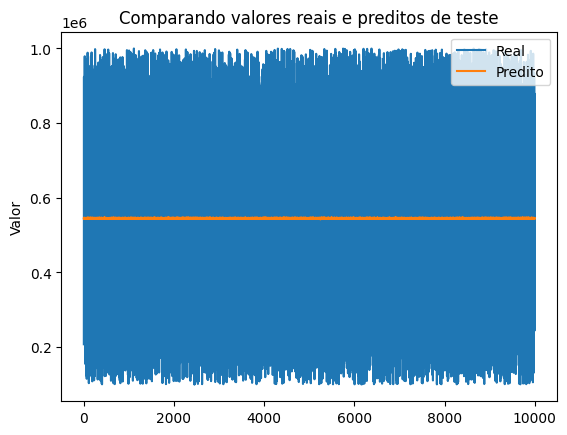

In [ ]:
grafico_x = [x for x in range(1,len(y_test_desnormalizado)+1)]

plt.plot(grafico_x, y_test_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()

In [ ]:
# Cria uma lista com todas as colunas do tipo object
colunas_object  = ec.select_dtypes(include='object').columns.tolist()

# Exibe a lista com todas as colunas do tipo object
colunas_object

['marca', 'cor', 'modelo', 'tamanho', 'material', 'categoria']

In [ ]:
for coluna in colunas_object:
    le = LabelEncoder()
    ec[coluna] = le.fit_transform(ec[coluna])

In [ ]:
X_ec = ec[ec.columns[:-1]]
y_ec = ec[['categoria']]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_ec)
X_ec = scaler.transform(X_ec)


scaler_features = MinMaxScaler()
scaler_features.fit(y_ec)
y_ec = scaler_features.transform(y_ec)

In [ ]:
X_train_ec, X_test_ec, y_train_ec, y_test_ec = train_test_split(X_ec, y_ec, test_size=0.05, random_state=10)

In [ ]:
# Criamos uma instância do modelo de rede neural
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

# compila o modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# treina o modelo
model.fit(X_train_ec, y_train_ec, epochs=7, verbose = 1)

predict_ec = model.predict(X_test_ec)

Epoch 1/7
5938/5938 [==============================] - 13s 2ms/step - loss: 0.1274 - mse: 0.1274
Epoch 2/7
5938/5938 [==============================] - 12s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 3/7
5938/5938 [==============================] - 13s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 4/7
5938/5938 [==============================] - 12s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 5/7
5938/5938 [==============================] - 12s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 6/7
5938/5938 [==============================] - 14s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 7/7
313/313 [==============================] - 0s 1ms/step


In [ ]:
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado_ec = scaler_features.inverse_transform(y_test_ec)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado_ec = scaler_features.inverse_transform(predict_ec)

# Calcula o mse com a biblioteca do sklearn
mse_ec = mean_squared_error(y_test_desnormalizado_ec, predict_desnormalizado_ec)
print("Mean squared error Regressão Linear: ", mse)

Mean squared error Regressão Linear:  66836655034.93049
